In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import h5py
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import FD as FD_file

In [2]:
allNs = list(np.arange(8, 150, 8))
meanerror_3R = []
meanerror_B2 = []
meanerror_BT = []
meanerror_E2 = []
meanerror_ET = []
for N in allNs:
    L = 20
    t = 1.5
    dx = L/N
    FD = FD_file.FD_Class(dx)
    xyz = np.arange(-L/2, L/2, dx)[:N]
    x, y, z = np.meshgrid(xyz, xyz, xyz, indexing='ij')
    Box_zero = np.zeros([N, N, N])
    Box_ones = np.ones([N, N, N])

    k = 2*np.pi/L
    A = 2.3+0.2*np.sin(k*z)
    dzA = k*0.2*np.cos(k*z)
    dzdzA = -k*k*0.2*np.sin(k*z)

    gdown = np.array([[t*A, Box_ones, Box_ones],
                          [Box_ones, t*A, Box_zero],
                          [Box_ones, Box_zero, t*A]])
    gdown4 = np.array([[-Box_ones, Box_zero, Box_zero, Box_zero],
                       [Box_zero, gdown[0,0], gdown[0,1], gdown[0,2]],
                       [Box_zero, gdown[1,0], gdown[1,1], gdown[1,2]],
                       [Box_zero, gdown[2,0], gdown[2,1], gdown[2,2]]])
    nup = np.array([Box_ones, Box_zero, Box_zero, Box_zero])
    Kdown = (-1/2)*np.array([[A, Box_zero, Box_zero],
                                 [Box_zero, A, Box_zero],
                                 [Box_zero, Box_zero, A]])
    
    glist = [gdown[0,0], gdown[0,1], gdown[0,2], gdown[1,1], gdown[1,2], gdown[2,2]]
    gdet = RRead.det(glist)
    gup = RRead.inv(glist, gdet)
    RCW = RCW_file.Ricci_CoGrad_Weyl_Class(dx)
    Gudd = RCW.Christoffel_symbol(gdown, gup)
    RicciTdown, RicciS3 = RCW.Ricci_TandS(gup, Gudd)
    RicciS3th = t*((2 + 3*(t*A)**2)*dzA**2 - 4*A*(-2 + (t*A)**2)*dzdzA)/(2*A*(-2 + (t*A)**2)**2)
    ERr = RicciS3/RicciS3th-1
    ERr_cut = list(ERr)
    for icut in [int(N/2)-2, int(N/2)-2, int(N/2)-2, 0, 0, 0]:
        ERr_cut = np.delete(ERr_cut, icut, axis=2)
    meanerror_3R += [np.mean(np.ma.masked_invalid(abs(ERr_cut)))]
    #meanerror_3R += [np.mean(np.ma.masked_invalid(abs(ERr)))]
    
    udown = np.array([-Box_ones, Box_zero, Box_zero, Box_zero])
    u_axu_b = np.einsum('a...,b...->ab...', udown, udown)
    hdown = gdown4 + u_axu_b
    G = 1
    kappa = 8*np.pi*G
    At2 = (A*t)**2

    aux0=(8.*((A)*((t)*(dzdzA))))+(-2.*(((A)**3.)*(3.+(2.*(((t)**3.)*(dzdzA))))))
    aux1=(2.*((t)*(((dzA)**2))))+((3.*((((A)**2))*(((t)**3.)*(((dzA)**2)))))+aux0)
    aux2=((-2.+((((A)**2))*(((t)**2))))**-2.)*((3.*(((A)**5.)*(((t)**2))))+aux1)
    rho = 0.25*aux2/(A*kappa)

    aux0=((A)*(8.+(-8.*(((t)**3.)*(dzdzA)))))+(((A)**3.)*((6.*(((t)**2)))+(4.*(((t)**5.)*(dzdzA)))))
    aux1=(-2.*(((t)**3.)*(((dzA)**2))))+((-3.*((((A)**2))*(((t)**5.)*(((dzA)**2)))))+aux0)
    aux2=((-2.+((((A)**2))*(((t)**2))))**-2.)*((3.*(((A)**5.)*((t)**4.)))+aux1)
    p=((0.0833333*(((t)**-2.)*aux2))/(A))/kappa

    aux0=(-6.+((((A)**2))*(((t)**2))))*(((-2.+((((A)**2))*(((t)**2))))**-2.)*(dzA));
    outputx=(0.25*aux0)/kappa;
    aux0=((-2.+((((A)**2))*(((t)**2))))**-2.)*((2.+((((A)**2))*(((t)**2))))*(dzA));
    outputy=(((0.25*aux0)/(t))/(A))/kappa;
    aux0=((-2.+((((A)**2))*(((t)**2))))**-2.)*((-2.+(7.*((((A)**2))*(((t)**2)))))*(dzA));
    outputz=(((-0.25*aux0)/(t))/(A))/kappa;
    qdown = np.array([Box_zero, outputx, outputy, outputz])

    aux0=(2.*(((A)**5.)*(((t)**5.)*(dzdzA))))+(2.*(((A)**3.)*(8.+(((t)**3.)*(dzdzA)))))
    aux1=(-3.*(((A)**4.)*(((t)**5.)*(((dzA)**2)))))+((-12.*((A)*((t)*(dzdzA))))+aux0)
    aux2=(6.*((t)*(((dzA)**2))))+((-7.*((((A)**2))*(((t)**3.)*(((dzA)**2)))))+aux1);
    outputxx=(t)*aux2;

    aux0=(8.*(((A)**3.)*(((t)**5.)*(dzdzA))))+((A)*(4.+(-16.*(((t)**3.)*(dzdzA)))));
    aux1=(8.*(((t)**3.)*(((dzA)**2))))+((-12.*((((A)**2))*(((t)**5.)*(((dzA)**2)))))+aux0);
    outputxy=(A)*((3.*(((A)**5.)*((t)**4.)))+aux1);

    aux0=(2.*(((A)**3.)*(((t)**5.)*(dzdzA))))+((A)*(4.+(-4.*(((t)**3.)*(dzdzA)))));
    aux1=(2.*(((t)**3.)*(((dzA)**2))))+((-3.*((((A)**2))*(((t)**5.)*(((dzA)**2)))))+aux0);
    outputxz=(A)*((3.*(((A)**5.)*((t)**4.)))+aux1);

    aux0=(2.*(((A)**3.)*(2.+(((t)**3.)*(dzdzA)))))+(2.*(((A)**5.)*((((t)**2))*(3.+(((t)**3.)*(dzdzA))))));
    aux1=(-3.*(((A)**4.)*(((t)**5.)*(((dzA)**2)))))+((-12.*((A)*((t)*(dzdzA))))+aux0);
    aux2=(6.*((t)*(((dzA)**2))))+((-7.*((((A)**2))*(((t)**3.)*(((dzA)**2)))))+aux1);
    outputyy=(t)*aux2;

    aux0=(-4.*((A)*((t)*(dzdzA))))+(2.*(((A)**3.)*(2.+(((t)**3.)*(dzdzA)))));
    aux1=(2.*((t)*(((dzA)**2))))+((-3.*((((A)**2))*(((t)**3.)*(((dzA)**2)))))+aux0);
    outputyz=3.*((t)*((-2.*(((A)**5.)*(((t)**2))))+aux1));

    aux0=(2.*(((A)**3.)*(2.+(7.*(((t)**3.)*(dzdzA))))))+(((A)**5.)*((6.*(((t)**2)))+(-4.*(((t)**5.)*(dzdzA)))));
    aux1=(6.*(((A)**4.)*(((t)**5.)*(((dzA)**2)))))+((-12.*((A)*((t)*(dzdzA))))+aux0);
    aux2=(6.*((t)*(((dzA)**2))))+((-13.*((((A)**2))*(((t)**3.)*(((dzA)**2)))))+aux1);
    outputzz=(t)*aux2;

    pidown = np.array([[Box_zero, Box_zero, Box_zero, Box_zero],
                       [Box_zero, outputxx, outputxy, outputxz],
                       [Box_zero, outputxy, outputyy, outputyz],
                       [Box_zero, outputxz, outputyz, outputzz]])
    pidown /= 12*kappa*At2*(-2 + At2)**2
    
    Tdown4 = rho*u_axu_b+p*hdown+np.einsum('a...,b...->ab...', qdown, udown)+np.einsum('b...,a...->ab...', qdown, udown)+pidown

    Edown, Eup, E2, Etrace = RCW.Weyl_E(gdown, gup, RicciS3, RicciTdown, Kdown, kappa, rho, 0.0, Tdown4[1:,1:])
    At = A*t
    g = At*(2 - At**2)
    c1 = 2 - 3*(At**2)
    c2 = 2 + 3*(At**2)
    c3 = - 6 + At**2 + At**4
    p1 = 2*(A**4)*c2 + 8*(At**3)*(dzA**2) + (t**4)*(dzA**4)*(3+At**2)
    p2 = -4*A*(At**2)*g + A*(t**4)*c3*(dzA**2)
    E2th = (p1*(c1**2) + 4*c1*p2*dzdzA - 4*A*(t**3)*c3*g*(dzdzA**2))/(96*(g**4))
    meanerror_E2 += [np.mean(np.ma.masked_invalid(abs(E2/E2th-1)))]
    meanerror_ET += [np.mean(np.ma.masked_invalid(abs(Etrace)))]
    
    Bdown, B2, Btrace = RCW.Weyl_B(gdown4, nup, gdown, gup, Gudd, Kdown)
    B2th = (5*abs(2*A*t - (A**3)*(t**3))*(dzA**2)*(2 + At2)**2 )/(32*At2*(-2 + At2)**5)
    EB2r = B2/B2th-1
    EB2r = np.delete(np.delete(B2/B2th-1, int(3*N/4), axis=2), int(N/4), axis=2)
    
    meanerror_B2 += [np.mean(np.ma.masked_invalid(abs(np.array(EB2r))))]
    meanerror_BT += [np.mean(np.ma.masked_invalid(abs(Btrace)))]
    print('N={}, error={:.2e}, {:.2e}, {:.2e}, {:.2e}, {:.2e}'.format(N, meanerror_3R[-1], meanerror_B2[-1], meanerror_BT[-1], meanerror_E2[-1], meanerror_ET[-1]))
    

N=8, error=1.57e-02, 2.50e-02, 1.48e-19, 1.33e-04, 2.07e-16
N=16, error=1.78e-03, 1.57e-03, 6.83e-20, 9.61e-06, 1.39e-16
N=24, error=3.52e-04, 3.11e-04, 1.16e-19, 1.94e-06, 1.66e-16
N=32, error=1.11e-04, 9.87e-05, 1.53e-19, 6.17e-07, 1.32e-16
N=40, error=4.66e-05, 4.05e-05, 1.49e-19, 2.53e-07, 1.52e-16
N=48, error=2.33e-05, 1.95e-05, 1.29e-19, 1.22e-07, 1.63e-16
N=56, error=1.30e-05, 1.06e-05, 1.33e-19, 6.59e-08, 1.90e-16
N=64, error=7.92e-06, 6.19e-06, 1.60e-19, 3.87e-08, 1.78e-16
N=72, error=5.11e-06, 3.86e-06, 1.51e-19, 2.42e-08, 1.59e-16
N=80, error=3.46e-06, 2.53e-06, 1.60e-19, 1.59e-08, 1.45e-16
N=88, error=2.43e-06, 1.73e-06, 1.48e-19, 1.09e-08, 1.70e-16
N=96, error=1.76e-06, 1.22e-06, 1.20e-19, 7.66e-09, 1.56e-16
N=104, error=1.32e-06, 8.88e-07, 1.04e-19, 5.56e-09, 1.50e-16
N=112, error=1.01e-06, 6.60e-07, 1.38e-19, 4.14e-09, 1.74e-16
N=120, error=7.84e-07, 5.01e-07, 1.32e-19, 3.14e-09, 1.58e-16
N=128, error=6.23e-07, 3.87e-07, 1.51e-19, 2.43e-09, 1.59e-16
N=136, error=5.03e-07

In [3]:
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

<IPython.core.display.Javascript object>


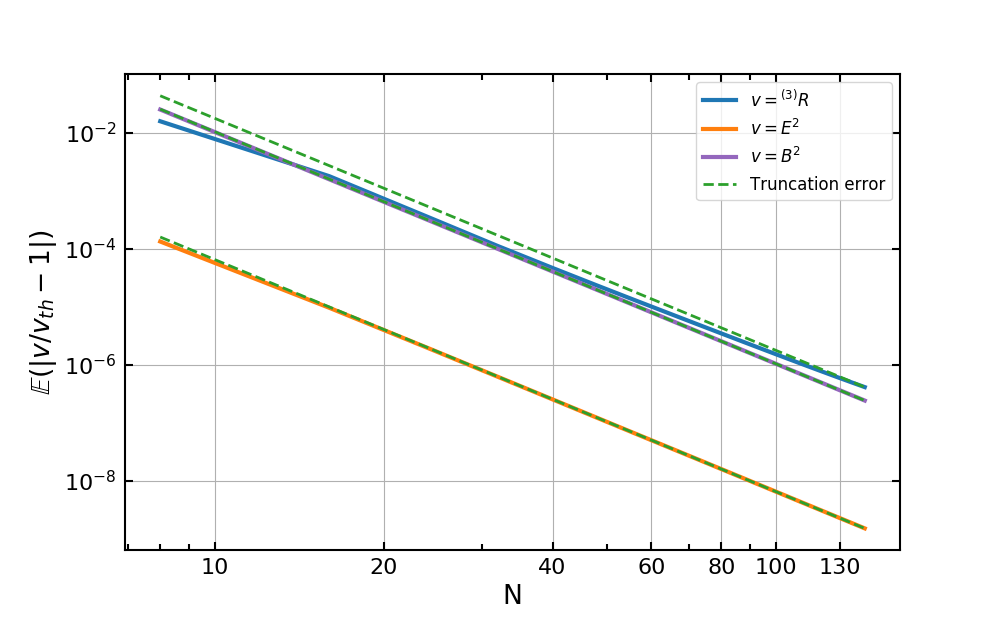

In [7]:
idec = -1


phi = (1+np.sqrt(5))/2
plt.figure(figsize=(10,10/phi))

plt.loglog(allNs, meanerror_3R, label=r'$v={}^{(3)}R$')
yplot_4th_order_decrease = [meanerror_3R[idec]*((allNs[idec]/N)**4) for N in allNs]
plt.loglog(allNs, yplot_4th_order_decrease, 'C2--', linewidth=2)

plt.loglog(allNs, meanerror_E2, 'C1', label=r'$v=E^2$')
yplot_4th_order_decrease = [meanerror_E2[idec]*((allNs[idec]/N)**4) for N in allNs]
plt.loglog(allNs, yplot_4th_order_decrease, 'C2--', linewidth=2)

plt.loglog(allNs, meanerror_B2, 'C4', label=r'$v=B^2$')
yplot_4th_order_decrease = [meanerror_B2[idec]*((allNs[idec]/N)**4) for N in allNs]
plt.loglog(allNs, yplot_4th_order_decrease, 'C2--', linewidth=2, label='Truncation error') #4th order increase


plt.legend(loc=1, prop={'size': 12})
plt.grid()
plt.xlabel('N')
plt.xticks([10,20,40,60,80,100,130], ['10','20','40','60','80','100','130'])
plt.xlim()
plt.ylabel(r'$\mathbb{E}\left(|v/v_{th}-1|\right)$')
#plt.ylim(1e-11, 1e-7)
plt.savefig('Plots/TestMetric_Slicing_withoutbumps.pdf')

In [8]:
import pandas as pd
data = np.array([allNs, meanerror_3R, meanerror_B2, meanerror_BT, meanerror_E2, meanerror_ET]).T
columns = ['N', '3R', 'B2', 'BT', 'E2', 'ET']
pd.DataFrame(data, columns=columns).to_csv('ErrorData/TestMetric_Slicing_withbumps.csv')